<a href="https://colab.research.google.com/github/CharalapML/ColabCode/blob/main/Final_mp4_to_fits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The following code was written to convert mp4 files to .fit files**

**The reason for this was on using my SeeStar astonomical scope I produced some mp4 files which I needed to convert to the more standeard .fit files used in astronomical circles.**

**I could not find anything freely available. Yes there are commercial products but I did not want to have to sign up for a commercial product.**

**Hence this code.**

**NB this code takes an mp4 file and produces a series of .jpg images.
This arguably reduces image quality as it compresses data. The code then converts the .jpg images to a series of .fit files which I have been able to import to astronomical software.**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from PIL import Image
import os
import cv2
import io

In [ ]:
import glob

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from numpy import asarray

In [ ]:
from astropy.io import fits
from astropy.io.fits import Header
from PIL import Image

Create paths where data will be loaded to.

In [ ]:
if os.path.exists("/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/"):
    image_path = "/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/"
    print('Directory path already exists')
else:
    image_path = "/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/"
    os.mkdir(image_path)

Directory path already exists


In [ ]:
if os.path.exists("/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/fits/"):
    fit_path = "/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/fits/"
    print('Directory fit_path already exists')
else:
    fit_path = "/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/fits/"
    os.mkdir(fit_path)

Directory fit_path already exists


Load you data from the folder where the data is.

In [ ]:
import moviepy.editor as mp
video_path = '/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/2024_05_05_114105_Solar_timelapse.mp4'
clip = mp.VideoFileClip(video_path)


Run through the video file. writing data to the given paths.

/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/frame.jpg
(1920, 1080, 3)
/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/R_numpy_0
/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/G_numpy_0
/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/B_numpy_0

/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/frame.jpg
(1920, 1080, 3)
/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/R_numpy_1
/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/G_numpy_1
/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/B_numpy_1

/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/frame.jpg
(1920, 1080, 3)
/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/R_numpy_2
/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/G_numpy_2
/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/B_numpy_2

/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/frame.jpg


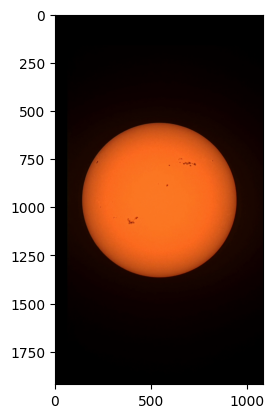

In [ ]:
frame_rate = 1  # number of frames persecond that you require. Adjust as needed
path1='/content/gdrive/MyDrive/ColabNotebooks/Create_FIT_files/frames/'
for i, frame in enumerate(clip.iter_frames(fps=frame_rate)):
    frame_path = f'{path1}frame.jpg'
    plt.imshow(frame)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.imwrite(frame_path,frame)

    print(frame_path)
    img = Image.open(frame_path)
    numpydata3D = asarray(img)

    print(numpydata3D.shape)

    frame_path = f'{path1}R_numpy_{i}'
    np.save(frame_path,numpydata3D[:,:,0])
    print(frame_path)

    frame_path = f'{path1}G_numpy_{i}'
    np.save(frame_path,numpydata3D[:,:,1])
    print(frame_path)

    frame_path = f'{path1}B_numpy_{i}'
    np.save(frame_path,numpydata3D[:,:,2])
    print(frame_path)

    # Create  the three individual fits files - one for each colour

    read_process_write(image_path, fit_path, "R", i)
    read_process_write(image_path, fit_path, "G", i)
    read_process_write(image_path, fit_path, "B", i)

    # Combine the three R, G, B fit files into a 3D fits colour file

    create3Dfits(fit_path,i)


In [ ]:
def read_process_write(image_path, fit_path, label, i):

  filename_input = f'{image_path}{label}_numpy_{i}.npy'
  npydata = np.load(filename_input)

  # Create a Primary HDU object with RGB data
  hdu = fits.PrimaryHDU(npydata)

  # Add headers to the Primary HDU
  hdr = hdu.header
  hdr['OBJECT']   = 'Test Object'          # Name of the object observed
  hdr['TELESCOP'] = 'Test Telescope'       # Telescope used
  hdr['INSTRUME'] = 'Test Instrument'      # Instrument (camera) used
  hdr['OBSERVER'] = 'Test Observer'        # Observer's name
  hdr['DATE-OBS'] = '2024-05-31T12:00:00'  # Observation date in ISO format
  hdr['EXPTIME']  = 60.0                   # Exposure time in seconds
  hdr['FILTER']   = 'RGB'                  # Filter used

  # Write HDU to a .fits file
  filename_output = f'{fit_path}{label}_numpydata_{i}.fits'
  hdu.writeto(filename_output, overwrite=True)

In [ ]:
# cube = np.zeros((3,1920,1080))  # 3 represents the three colours (RGB) whilst 1920 & 1080 are the 2D dimensions of the individual RGB fits images
# def create3Dfits(fit_path,i):
#   for label in ['R','G','B']:
#     filename_output = f'{fit_path}{label}_numpydata_{i}.fits'
#     hdu = fits.open(filename_output) #takes the 2D fits images that you want to combine
#     data = hdu[0].data[:,:]
#     cube[i,:,:] = data   #This CANNOT be i in the head loop which could be gt 3. But here  it will be eithe 0, 1 or 2

#   hdu_new = fits.PrimaryHDU(cube)
#   hdu_new.writeto(f'{fit_path}cube_{i}.fits', overwrite=True)
#   print()


In [ ]:
cube = np.zeros((3,1920,1080))  # 3 represents the three colours (RGB) whilst 1920 & 1080 are the 2D pixel dimensions of the individual RGB fits images
def create3Dfits(fit_path,i):
  for label in ['R','G','B']:
    filename_output = f'{fit_path}{label}_numpydata_{i}.fits'
    hdu = fits.open(filename_output) #takes the 2D fits images that you want to combine
    data = hdu[0].data[:,:]
    # if label == 'R':
    #   x = 0
    # elif label == 'G':
    #   x = 1
    # else:
    #   x = 2
    x = 0 if label == 'R' else 1 if label == 'G' else 2

    cube[x,:,:] = data   #This CANNOT be i in the head loop which could be gt 3. But here it will be either 0, 1 or 2

  hdu_new = fits.PrimaryHDU(cube)
  hdu_new.writeto(f'{fit_path}cube_{i}.fits', overwrite=True)
  print()